# EDA placeholder

In [21]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
import os
print(os.getcwd()) 

c:\Users\ferna\Desktop\EDA_Dropshipping\EDA_Dropshipping\src\notebooks


In [75]:

amazon = pd.read_csv('../data/amazon.csv')

# Estadísticas descriptivas
print("Estadísticas descriptivas:")
print(amazon.describe())

print("\n" + "="*50 + "\n")

# Ver los nombres de las columnas
print("Columnas disponibles:")
print(amazon.columns.tolist())


# Verificar valores nulos
print("Valores nulos por columna:")
print(amazon.isnull().sum())

# Opción 1: Ver los nombres de las columnas
amazon.columns

Estadísticas descriptivas:
        product_id  \
count         1465   
unique        1351   
top     B08WRWPM22   
freq             3   

                                                                                                                                                     product_name  \
count                                                                                                                                                        1465   
unique                                                                                                                                                       1337   
top     Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution   
freq                                                                                                                                                            5   

                                    

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [24]:
amazon.head(20)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹149,"₹1,000",85%,3.9,"24,871",Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,₹176.63,₹499,65%,4.1,"15,188",It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https://m.media-amazon.com/images/W/WEBP_4

In [ ]:
amazon_exploded = amazon.assign(category=amazon["category"].str.split("|")).explode("category")
amazon_exploded["category"] = amazon_exploded["category"].str.strip()

amazon_exploded["category"].nunique()


317

In [26]:
amazon_exploded["category"].value_counts().head(20)

category
Electronics                   526
Computers&Accessories         453
Home&Kitchen                  448
Accessories&Peripherals       381
Kitchen&HomeAppliances        308
Cables                        267
Cables&Accessories            240
USBCables                     233
SmallKitchenAppliances        181
HomeTheater,TV&Video          162
Mobiles&Accessories           161
Heating,Cooling&AirQuality    116
Accessories                   111
MobileAccessories              84
Vacuum,Cleaning&Ironing        82
Smartphones&BasicMobiles       77
SmartWatches                   76
WearableTechnology             76
Televisions                    69
Smartphones                    68
Name: count, dtype: int64

                  category  num_productos
0              Electronics            526
1    Computers&Accessories            453
2             Home&Kitchen            448
3  Accessories&Peripherals            381
4   Kitchen&HomeAppliances            308


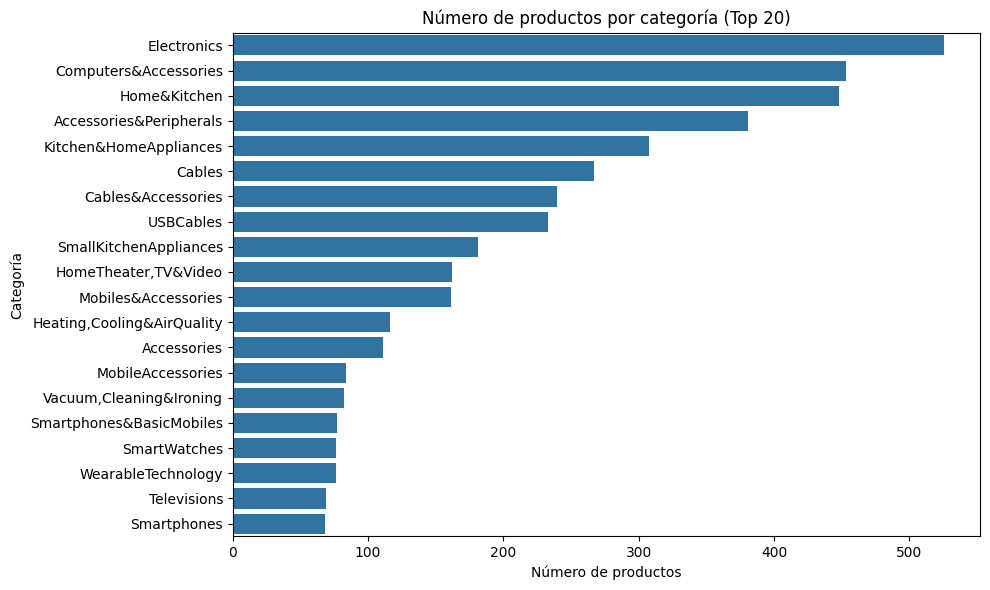

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Conteo con nombres correctos
categorias = (
    amazon_exploded["category"]
      .value_counts()
      .rename_axis("category")        # índice -> columna 'category'
      .reset_index(name="num_productos")  # conteo -> 'num_productos'
)

# 2) Top 20
top20 = categorias.head(20)

# (opcional) comprueba que existen las columnas
print(top20.head())

# 3) Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=top20, x="num_productos", y="category")
plt.title("Número de productos por categoría (Top 20)")
plt.xlabel("Número de productos")
plt.ylabel("Categoría")
plt.tight_layout()
plt.show()


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Aseguramos que rating y rating_count sean numéricos

amazon_exploded["rating"] = pd.to_numeric(amazon_exploded["rating"], errors="coerce")
amazon_exploded["rating_count"] = pd.to_numeric(amazon_exploded["rating_count"], errors="coerce")

# --- 1. Agrupar por categoría y calcular métricas ---
nicho = (
    amazon_exploded.groupby("category", as_index=False)
    .agg(
        num_productos=("product_id", "nunique"),
        total_reviews=("rating_count", "sum"),
        rating_medio=("rating", "mean")
    )
)

# --- 2. Calcular reviews por producto ---
nicho["reviews_por_producto"] = nicho["total_reviews"] / nicho["num_productos"]

# --- 3. Eliminar valores extremos o categorías vacías ---
nicho = nicho.dropna(subset=["reviews_por_producto"])
nicho = nicho[nicho["total_reviews"] > 0]

# --- 4. Ordenar para ver los top nichos por eficiencia ---
top_nichos = nicho.sort_values("reviews_por_producto", ascending=False).head(15)

# Ver la tabla resultante (muy útil para revisar)
print(top_nichos[["category", "num_productos", "total_reviews", "reviews_por_producto", "rating_medio"]])


                   category  num_productos  total_reviews  \
1    AVReceivers&Amplifiers              1          897.0   
235              SATACables              1          817.0   
0                 3DGlasses              1          621.0   
76                  Earpads              1          594.0   
269    StovetopEspressoPots              1          590.0   
106          HalogenHeaters              2         1127.0   
316            YogurtMakers              1          557.0   
262             StandMixers              1          534.0   
45           CoffeeGrinders              1          478.0   
78         ElectricGrinders              1          478.0   
110         HandheldVacuums              8         3471.0   
49            ColouredPaper              1          388.0   
233              RotiMakers              1          388.0   
57       Copy&PrintingPaper              1          388.0   
137      InternalHardDrives              1          362.0   

     reviews_por_produc

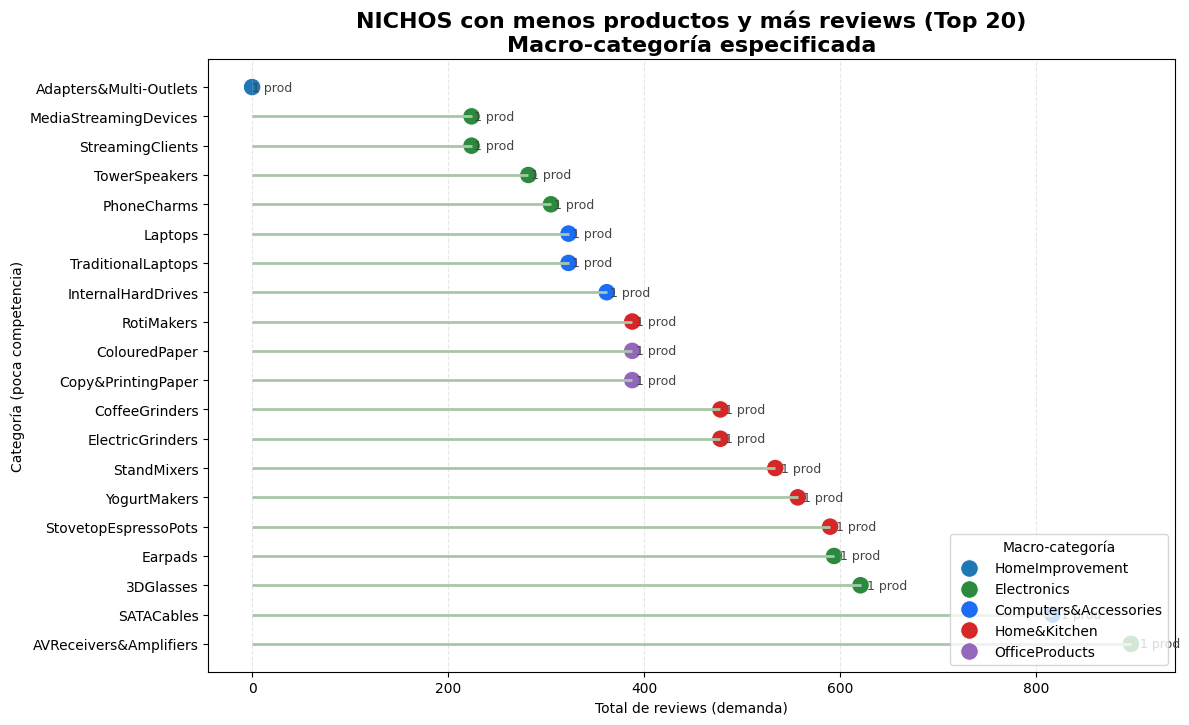

In [52]:
# === Requiere: amazon (rutas con '|'), amazon_exploded, y top20_low_comp del bloque que ya tienes ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Macro-categoría (primer nivel de la ruta) por product_id
routes = amazon[["product_id", "category"]].copy()
routes["macro"] = routes["category"].astype(str).str.split("|").str[0].str.strip()
macro_by_prod = routes[["product_id", "macro"]].dropna()

# 2) Hoja -> macro más frecuente (modo) usando los product_id
leaf_macro = (
    amazon_exploded[["product_id", "category"]]
      .merge(macro_by_prod, on="product_id", how="left")
      .groupby("category")["macro"]
      .agg(lambda s: s.dropna().mode().iat[0] if s.dropna().size else "Unknown")
      .reset_index()
      .rename(columns={"macro": "macro_category"})
)

# 3) Data para el gráfico (Top 20 hojas con poca competencia que ya calculaste)
plot_df = (
    top20_low_comp.merge(leaf_macro, on="category", how="left")
                  .sort_values("total_reviews", ascending=True)
                  .reset_index(drop=True)
)

# 4) Paleta: resalta Electronics y Computers&Accessories, el resto con una paleta suave
unique_macros = plot_df["macro_category"].fillna("Unknown").unique().tolist()
palette = dict(zip(unique_macros, sns.color_palette("tab10", n_colors=len(unique_macros))))
# Colores fijos para las dos que te interesan
palette["Electronics"] = "#2b8a3e"              # verde
palette["Computers&Accessories"] = "#1b6ef3"    # azul fuerte
palette.setdefault("Unknown", "#999999")

# 5) Lollipop plot
plt.figure(figsize=(12, 8))

# Palos
plt.hlines(y=plot_df["category"], xmin=0, xmax=plot_df["total_reviews"],
           color="#a7c7a9", lw=2)

# Caramelos coloreados por macro-categoría
sns.scatterplot(
    data=plot_df,
    x="total_reviews", y="category",
    hue="macro_category", palette=palette,
    s=160, edgecolor="white", linewidth=0.7
)

# Anota nº de productos al final de cada barra
for _, r in plot_df.iterrows():
    plt.text(r["total_reviews"] * 1.01, r["category"],
             f'{int(r["num_productos"])} prod',
             va="center", fontsize=9, color="#444")

plt.title("NICHOS con menos productos y más reviews (Top 20)\nMacro-categoría especificada",
          fontsize=16, weight="bold")
plt.xlabel("Total de reviews (demanda)")
plt.ylabel("Categoría (poca competencia)")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.legend(title="Macro-categoría", loc="lower right", frameon=True)
plt.tight_layout()
plt.tight_layout(rect=(0, 0, 1, 0.92))
plt.show()


In [45]:
import pandas as pd
import numpy as np

# Asegura numéricos
amazon_exploded["rating_count"] = pd.to_numeric(amazon_exploded["rating_count"], errors="coerce").fillna(0)

# Agregado por categoría hoja
nicho = (
    amazon_exploded.groupby("category", as_index=False)
    .agg(num_productos=("product_id", "nunique"),
         total_reviews=("rating_count", "sum"))
)
nicho["reviews_por_producto"] = nicho["total_reviews"] / nicho["num_productos"]

# Umbral de "poca competencia" -> bottom 25% por nº de productos
cutoff = nicho["num_productos"].quantile(0.25)
nicho_low_comp = nicho.query("num_productos <= @cutoff").copy()

# Ordena por demanda (y eficiencia)
nicho_low_comp = nicho_low_comp.sort_values(
    ["total_reviews","reviews_por_producto","num_productos"],
    ascending=[False, False, True]
).reset_index(drop=True)

# TOP 20
top20_low_comp = nicho_low_comp.head(20).copy()


In [46]:
# Formato bonito
tbl = top20_low_comp.assign(
    num_productos=top20_low_comp["num_productos"].astype(int),
    total_reviews=top20_low_comp["total_reviews"].astype(int),
    reviews_por_producto=top20_low_comp["reviews_por_producto"].round(1)
)[["category","num_productos","total_reviews","reviews_por_producto"]]

# Styler con gradiente
tbl_style = (
    tbl.style
    .background_gradient(subset=["total_reviews"], cmap="Greens")
    .background_gradient(subset=["reviews_por_producto"], cmap="Greens")
    .format({"num_productos":"{:,.0f}","total_reviews":"{:,.0f}","reviews_por_producto":"{:,.1f}"})
)

display(tbl_style)


,category,num_productos,total_reviews,reviews_por_producto
0,AVReceivers&Amplifiers,1,897,897.0
1,SATACables,1,817,817.0
2,3DGlasses,1,621,621.0
3,Earpads,1,594,594.0
4,StovetopEspressoPots,1,590,590.0
5,YogurtMakers,1,557,557.0
6,StandMixers,1,534,534.0
7,CoffeeGrinders,1,478,478.0
8,ElectricGrinders,1,478,478.0
9,ColouredPaper,1,388,388.0


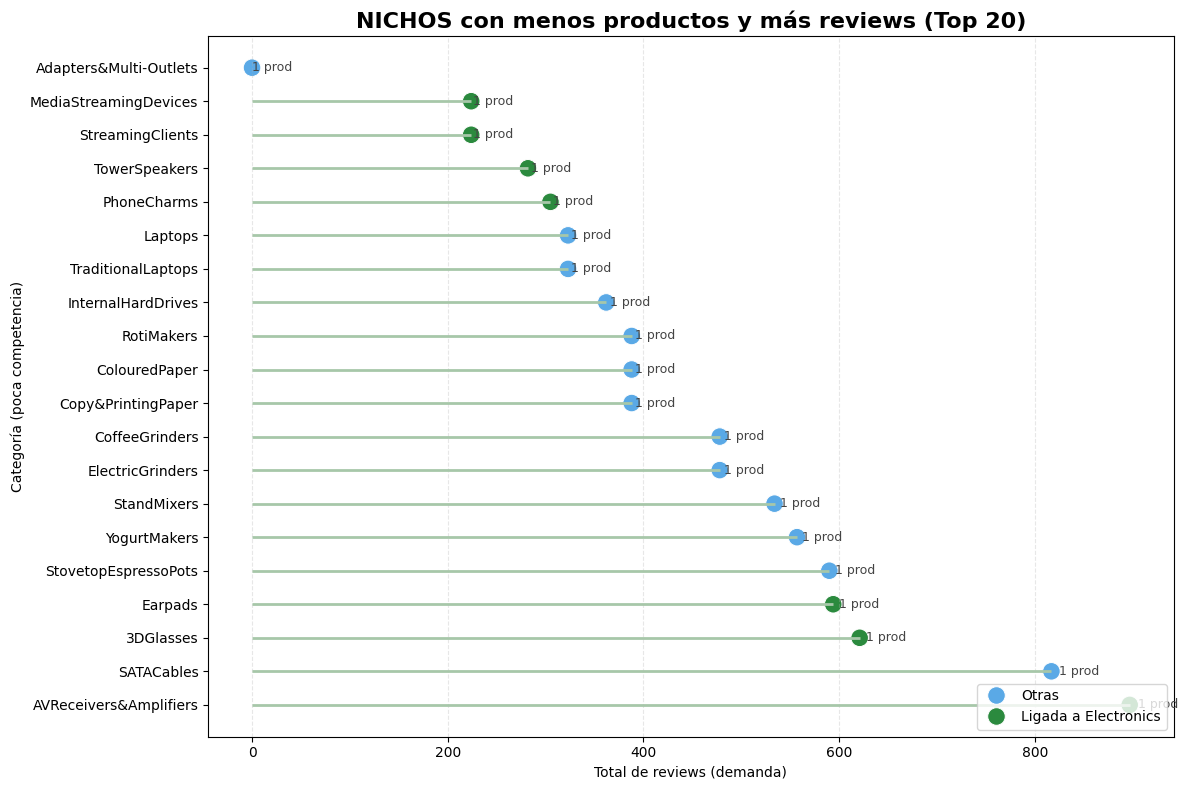

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# ---------- (Opcional) marcar si la categoría está ligada a Electronics ----------
# Creamos un flag por producto a partir del DF original "amazon" con categorías crudas
is_elec_by_prod = (
    amazon.assign(_is_elec=amazon["category"].astype(str).str.contains("Electronics", case=False, na=False))
    .groupby("product_id", as_index=False)["_is_elec"].max()
)

# Calculamos % de productos "Electronics" dentro de cada categoría hoja
elec_share = (
    amazon_exploded.merge(is_elec_by_prod, on="product_id", how="left")
    .groupby("category", as_index=False)["_is_elec"].mean()
    .rename(columns={"_is_elec":"share_electronics"})
)

plot_df = (
    top20_low_comp.merge(elec_share, on="category", how="left")
    .assign(tag=lambda d: np.where(d["share_electronics"].fillna(0)>=0.5, "Ligada a Electronics","Otras"))
)

# ---------- Lollipop plot ----------
plot_df = plot_df.sort_values("total_reviews", ascending=True)  # para horizontal de abajo a arriba

plt.figure(figsize=(12,8))
# "palos"
plt.hlines(y=plot_df["category"], xmin=0, xmax=plot_df["total_reviews"], color="#a7c7a9", lw=2)
# "caramelos" (círculos)
sns.scatterplot(
    data=plot_df,
    x="total_reviews", y="category",
    hue="tag", palette={"Ligada a Electronics":"#2b8a3e","Otras":"#5aa9e6"},
    s=160, edgecolor="white", linewidth=0.7
)

# Etiquetas con nº de productos al final de la barra
for _, r in plot_df.iterrows():
    plt.text(r["total_reviews"]*1.01, r["category"], f'{int(r["num_productos"])} prod',
             va="center", fontsize=9, color="#444")

plt.title("NICHOS con menos productos y más reviews (Top 20)", fontsize=16, weight="bold")
plt.xlabel("Total de reviews (demanda)")
plt.ylabel("Categoría (poca competencia)")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.legend(title="", loc="lower right")
plt.tight_layout()
plt.show()


In [40]:
import pandas as pd

# --- 1) Prepara lista de categorías ganadoras ---
cats_ganadoras = top20_nichos["category"].tolist()

# --- 2) Filtra productos de esas categorías y asegura numéricos ---
dfw = amazon_exploded[amazon_exploded["category"].isin(cats_ganadoras)].copy()
dfw["rating"] = pd.to_numeric(dfw["rating"], errors="coerce")
dfw["rating_count"] = pd.to_numeric(dfw["rating_count"], errors="coerce").fillna(0)

# --- 3) Agrega al nivel producto (evita duplicados por multi-categoría) ---
#    Elegimos una “categoría principal” para mostrar (la primera que aparezca en tus datos).
prod_cat = (dfw.groupby(["product_id","product_name"], as_index=False)
              .agg(
                   categoria=("category","first"),
                   total_reviews=("rating_count","sum"),
                   rating_medio=("rating","mean")
              ))

# --- 4A) TOP-3 productos por categoría (ordenados por reviews) ---
top3_por_cat = (prod_cat.sort_values(["categoria","total_reviews"], ascending=[True, False])
                        .groupby("categoria")
                        .head(3)
                        .reset_index(drop=True))

# Formato bonito
top3_por_cat["rating_medio"] = top3_por_cat["rating_medio"].round(2)
top3_por_cat["total_reviews"] = top3_por_cat["total_reviews"].astype(int)

print("TOP-3 productos por cada categoría ganadora:")
display(top3_por_cat[["categoria","product_name","rating_medio","total_reviews"]])

# --- 4B) Si quieres SOLO el líder de cada categoría (Top-1) ---
top1_por_cat = (prod_cat.sort_values(["categoria","total_reviews"], ascending=[True, False])
                        .groupby("categoria")
                        .head(1)
                        .reset_index(drop=True))

top1_por_cat["rating_medio"] = top1_por_cat["rating_medio"].round(2)
top1_por_cat["total_reviews"] = top1_por_cat["total_reviews"].astype(int)

print("Líder (Top-1) por categoría ganadora:")
display(top1_por_cat[["categoria","product_name","rating_medio","total_reviews"]])


TOP-3 productos por cada categoría ganadora:


,categoria,product_name,rating_medio,total_reviews
0,3DGlasses,Irusu Play VR Plus Virtual Reality Headset wit...,3.5,621
1,AVReceivers&Amplifiers,Cubetek 3 in 1 LCD Display V5.0 Bluetooth Tran...,4.0,897
2,CoffeeGrinders,IKEA Frother for Milk,3.3,956
3,Copy&PrintingPaper,BRUSTRO Copytinta Coloured Craft Paper A4 Size...,4.3,776
4,DripCoffeeMachines,Raffles Premium Stainless Steel South Indian C...,4.1,693
5,DripCoffeeMachines,Amazon Basics 650 Watt Drip Coffee Maker with ...,4.1,618
6,DripCoffeeMachines,"PHILIPS Drip Coffee Maker HD7432/20, 0.6 L, Id...",4.0,178
7,Earpads,"Silicone Rubber Earbuds Tips, Eartips, Earpads...",3.8,594
8,HalogenHeaters,Bajaj Deluxe 2000 Watts Halogen Room Heater (S...,3.7,787
9,HalogenHeaters,KHAITAN AVAANTE KA-2013 1200 Watt 3-Rod Haloge...,3.5,340


Líder (Top-1) por categoría ganadora:


,categoria,product_name,rating_medio,total_reviews
0,3DGlasses,Irusu Play VR Plus Virtual Reality Headset wit...,3.5,621
1,AVReceivers&Amplifiers,Cubetek 3 in 1 LCD Display V5.0 Bluetooth Tran...,4.0,897
2,CoffeeGrinders,IKEA Frother for Milk,3.3,956
3,Copy&PrintingPaper,BRUSTRO Copytinta Coloured Craft Paper A4 Size...,4.3,776
4,DripCoffeeMachines,Raffles Premium Stainless Steel South Indian C...,4.1,693
5,Earpads,"Silicone Rubber Earbuds Tips, Eartips, Earpads...",3.8,594
6,HalogenHeaters,Bajaj Deluxe 2000 Watts Halogen Room Heater (S...,3.7,787
7,HandheldVacuums,Eureka Forbes car Vac 100 Watts Powerful Sucti...,NaN,992
8,InternalHardDrives,"Lapster Caddy for ssd and HDD, Optical Bay 2nd...",4.2,362
9,Laptops,"Lenovo IdeaPad 3 11th Gen Intel Core i3 15.6"" ...",4.0,646


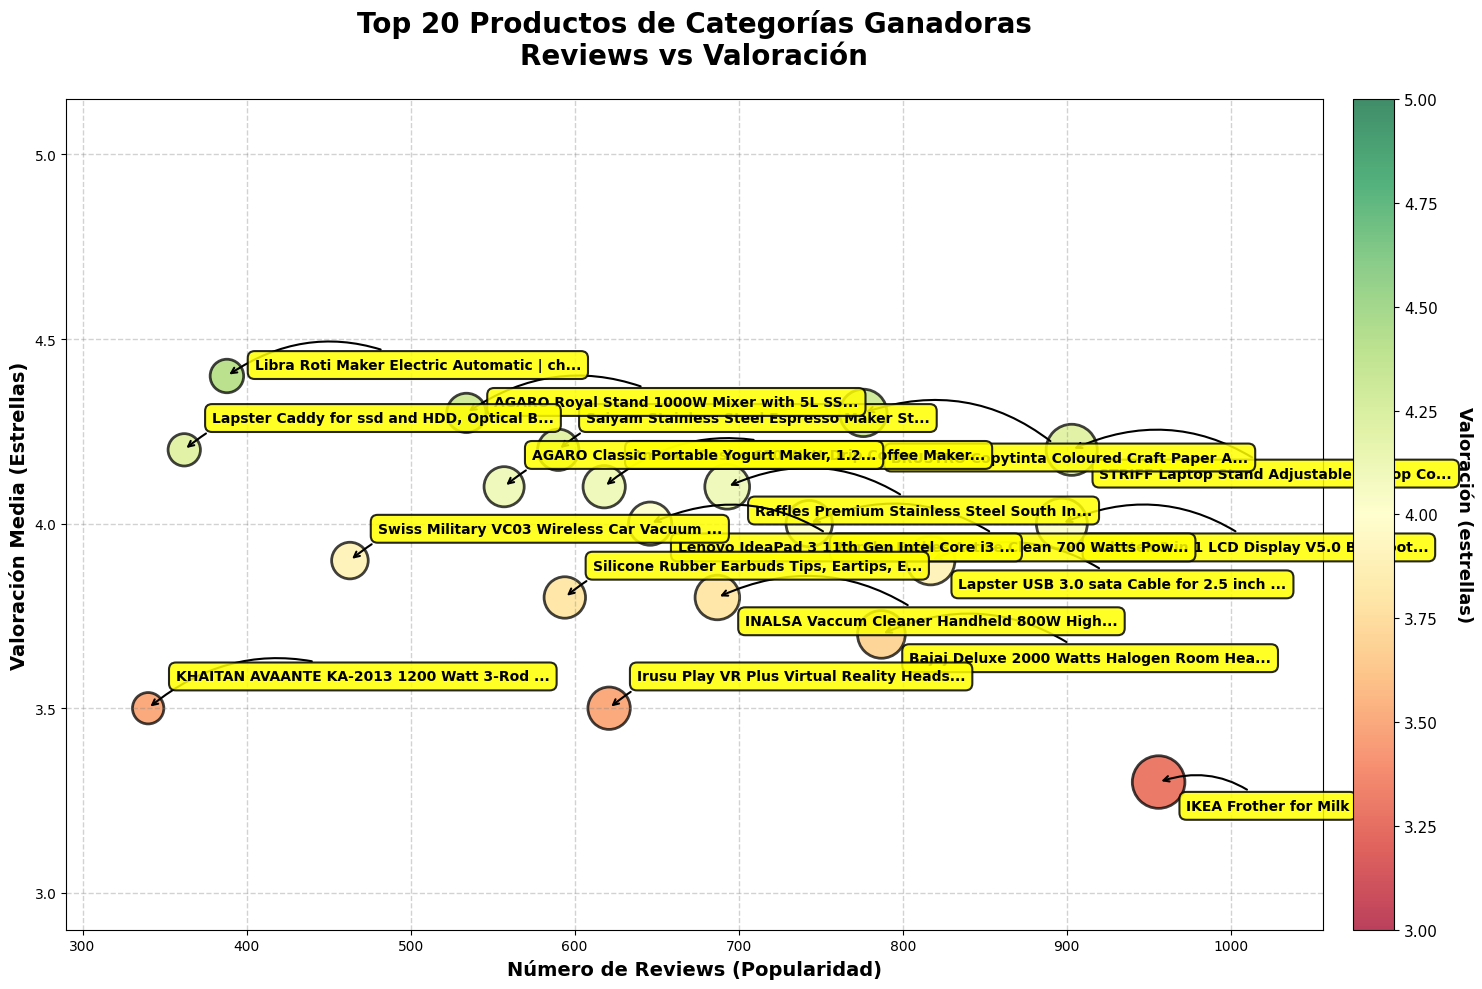

In [63]:









cats_ganadoras = top20_nichos["category"].tolist()

dfp = amazon_exploded[amazon_exploded["category"].isin(cats_ganadoras)].copy()
dfp["rating"] = pd.to_numeric(dfp["rating"], errors="coerce")
dfp["rating_count"] = pd.to_numeric(dfp["rating_count"], errors="coerce").fillna(0)

prod = (dfp.groupby(["product_id","product_name"], as_index=False)
          .agg(
              categoria=("category","first"),
              total_reviews=("rating_count","sum"),
              rating_medio=("rating","mean")
          ))


prod = prod.dropna(subset=["rating_medio"])
top20_prods = prod.sort_values("total_reviews", ascending=False).head(20).copy()

# Etiqueta legible
max_chars = 40
top20_prods["label"] = top20_prods["product_name"].str[:max_chars]
top20_prods["label"] = top20_prods["label"].apply(
    lambda x: x if len(x) < max_chars else x + "..."
)


# ---------- 3) Versión mejorada con TODAS las etiquetas visibles ----------
fig, ax = plt.subplots(figsize=(16, 10))

top20_prods["label_corta"] = top20_prods["product_name"].str.split().str[:2].str.join(" ")


scatter = ax.scatter(
    top20_prods["total_reviews"],
    top20_prods["rating_medio"],
    s=top20_prods["total_reviews"] * 1.5,
    c=top20_prods["rating_medio"],
    cmap="RdYlGn",
    alpha=0.75,
    edgecolors="black",
    linewidth=2,
    vmin=3.0,
    vmax=5.0
)

# Colorbar más visible
cbar = plt.colorbar(scatter, ax=ax, pad=0.02)
cbar.set_label("Valoración (estrellas)", rotation=270, labelpad=25, fontsize=13, weight="bold")
cbar.ax.tick_params(labelsize=11)

# Etiquetar TODOS los productos con mejor posicionamiento
for idx, r in top20_prods.iterrows():
    # Posición de la flecha según ubicación del punto
    if r["total_reviews"] > top20_prods["total_reviews"].median():
        xytext = (20, -20)  # Puntos a la derecha: flecha abajo-derecha
    else:
        xytext = (20, 20)   # Puntos a la izquierda: flecha arriba-derecha
    
    # Si el rating es alto, ajustar para arriba
    if r["rating_medio"] > 4.2:
        xytext = (xytext[0], xytext[1] - 15)
    
    ax.annotate(
        r["label"],
        xy=(r["total_reviews"], r["rating_medio"]),
        xytext=xytext,
        textcoords="offset points",
        fontsize=10,
        weight="semibold",
        bbox=dict(
            boxstyle="round,pad=0.5", 
            facecolor="yellow", 
            edgecolor="black",
            alpha=0.85,
            linewidth=1.5
        ),
        arrowprops=dict(
            arrowstyle="->", 
            connectionstyle="arc3,rad=0.3",
            lw=1.5,
            color="black"
        )
    )

ax.set_title(
    "Top 20 Productos de Categorías Ganadoras\nReviews vs Valoración",
    fontsize=20,
    weight="bold",
    pad=25
)
ax.set_xlabel("Número de Reviews (Popularidad)", fontsize=14, weight="bold")
ax.set_ylabel("Valoración Media (Estrellas)", fontsize=14, weight="bold")
ax.set_ylim(2.9, 5.15)  # Más espacio arriba y abajo
ax.set_xlim(top20_prods["total_reviews"].min() - 50, 
            top20_prods["total_reviews"].max() + 100)  # Más espacio lateral
ax.grid(True, linestyle="--", alpha=0.35, color="gray", linewidth=1)



plt.tight_layout()
plt.show()

C:\Users\ferna\AppData\Local\Temp\ipykernel_59880\1980547318.py:134: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=(0,0,1,0.93))
c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


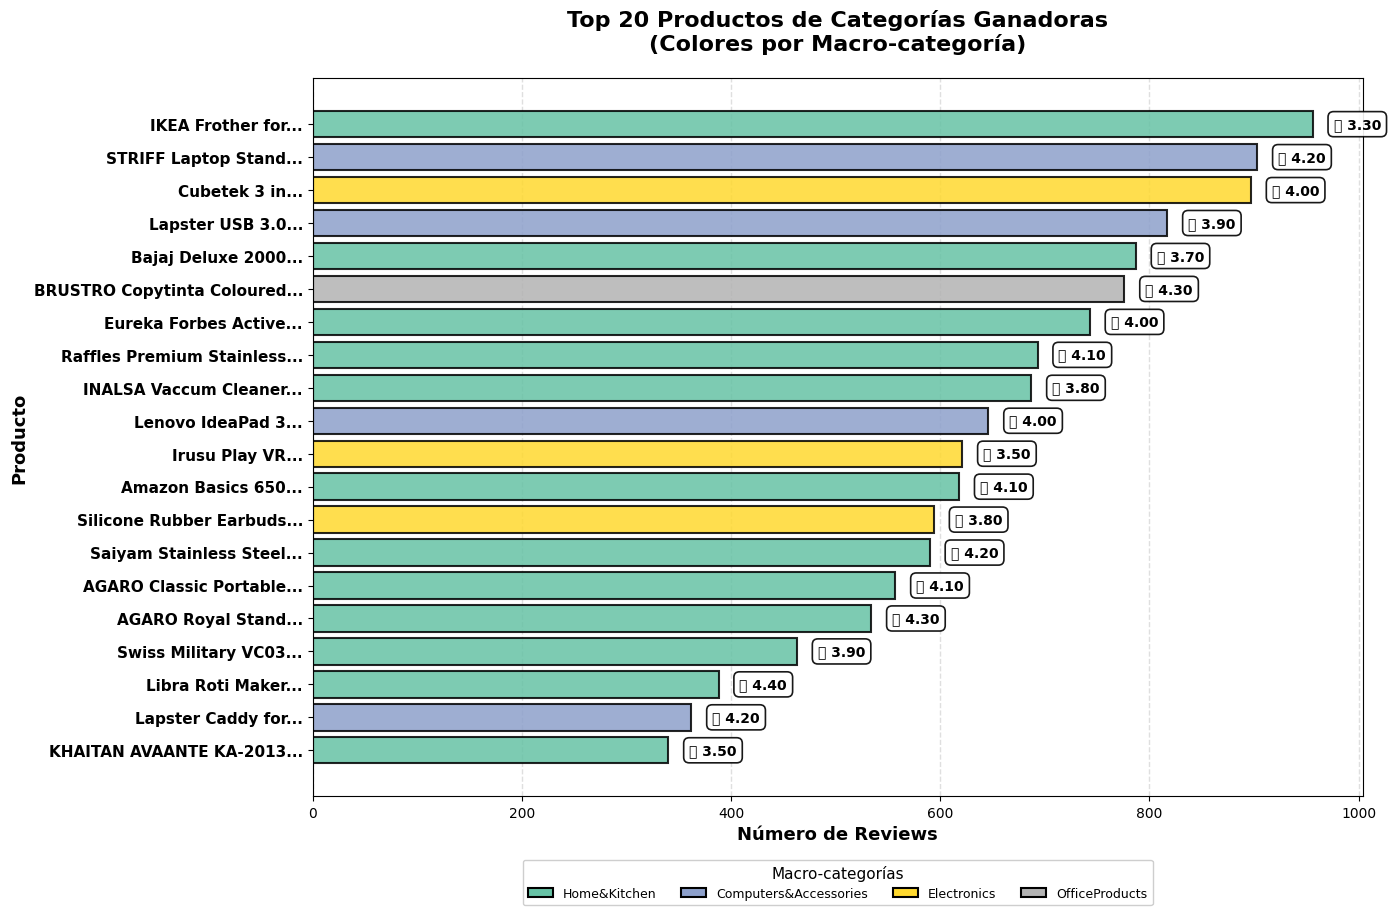

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 1) Elegimos las categorías ganadoras ----------
cats_ganadoras = top20_nichos["category"].tolist()

# ---------- 2) Nivel producto dentro de esas categorías ----------
dfp = amazon_exploded[amazon_exploded["category"].isin(cats_ganadoras)].copy()
dfp["rating"] = pd.to_numeric(dfp["rating"], errors="coerce")
dfp["rating_count"] = pd.to_numeric(dfp["rating_count"], errors="coerce").fillna(0)

prod = (dfp.groupby(["product_id","product_name"], as_index=False)
          .agg(
              categoria=("category","first"),
              total_reviews=("rating_count","sum"),
              rating_medio=("rating","mean")
          ))

prod = prod.dropna(subset=["rating_medio"])

# ---------- 2.1) Añadir MACRO-CATEGORÍA (primer nivel de la ruta en 'amazon') ----------
rutas = amazon[["product_id","category"]].copy()
rutas["macro"] = rutas["category"].astype(str).str.split("|").str[0].str.strip()
macro_by_prod = rutas[["product_id","macro"]].dropna()

prod = prod.merge(macro_by_prod, on="product_id", how="left")
prod["macro"] = prod["macro"].fillna("Unknown")

# Top 20 por reviews
top20_prods = prod.sort_values("total_reviews", ascending=False).head(20).copy()

# Etiqueta corta: solo 3 primeras palabras
top20_prods["nombre_corto"] = top20_prods["product_name"].apply(
    lambda x: " ".join(str(x).split()[:3]) + "..."
)

# (Opcional) incluir la macro en la etiqueta de la izquierda para más contexto
SHOW_MACRO_IN_LABELS = False
if SHOW_MACRO_IN_LABELS:
    top20_prods["nombre_corto"] = top20_prods["nombre_corto"] + " · " + top20_prods["macro"]

# ---------- 3) Crear mapa de colores por MACRO-CATEGORÍA ----------
macros_unicas = top20_prods["macro"].unique()
colores_macros = plt.cm.Set2(np.linspace(0, 1, len(macros_unicas)))
mapa_colores = dict(zip(macros_unicas, colores_macros))

# Asignar color a cada producto según su macro
top20_prods["color"] = top20_prods["macro"].map(mapa_colores)

# ---------- 4) Gráfico de barras horizontales ----------
fig, ax = plt.subplots(figsize=(14, 10))

# Ordenar de menor a mayor para que el más popular quede arriba
top20_prods_sorted = top20_prods.sort_values("total_reviews", ascending=True)

# Barras horizontales con colores por MACRO
bars = ax.barh(
    range(len(top20_prods_sorted)),
    top20_prods_sorted["total_reviews"],
    color=top20_prods_sorted["color"].tolist(),
    edgecolor="black",
    linewidth=1.5,
    alpha=0.85
)

# Nombres de productos en el eje Y
ax.set_yticks(range(len(top20_prods_sorted)))
ax.set_yticklabels(top20_prods_sorted["nombre_corto"], fontsize=11, weight="semibold")

# Mostrar número de estrellas AL FINAL de cada barra
for i, (_, row) in enumerate(top20_prods_sorted.iterrows()):
    ax.text(
        row["total_reviews"] + 20,
        i,
        f"⭐ {row['rating_medio']:.2f}",
        va="center",
        fontsize=10,
        weight="bold",
        bbox=dict(boxstyle="round,pad=0.4", facecolor="white",
                  edgecolor="black", linewidth=1.2, alpha=0.9)
    )

# Títulos y etiquetas
ax.set_xlabel("Número de Reviews", fontsize=13, weight="bold")
ax.set_ylabel("Producto", fontsize=13, weight="bold")
ax.set_title(
    "Top 20 Productos de Categorías Ganadoras\n(Colores por Macro-categoría)",
    fontsize=16, weight="bold", pad=20
)

# Grid
ax.grid(axis="x", linestyle="--", alpha=0.4, linewidth=1)
ax.set_axisbelow(True)

# ---------- Leyenda con MACRO-CATEGORÍAS ----------
from matplotlib.patches import Rectangle
legend_elements = []
for macro, color in mapa_colores.items():
    legend_elements.append(
        Rectangle((0,0), 1, 1, facecolor=color, edgecolor="black",
                  linewidth=1.5, label=macro)
    )

# Coloca la leyenda arriba, centrada, fuera del área del gráfico

leg = ax.get_legend()
if leg is not None:
    leg.remove()

# --- CREA la leyenda abajo, centrada, en columnas ---
from matplotlib.patches import Rectangle
legend_elements = []
for macro, color in mapa_colores.items():
    legend_elements.append(
        Rectangle((0,0), 1, 1, facecolor=color, edgecolor="black",
                  linewidth=1.5, label=macro)
    )

ax.legend(
    handles=legend_elements,
    title="Macro-categorías",
    loc="upper center",            # base
    bbox_to_anchor=(0.5, -0.08),   # ⬅️ abajo (negativo saca fuera del plot)
    ncol=min(4, len(legend_elements)),
    fontsize=9,
    title_fontsize=11,
    framealpha=0.95
)



plt.tight_layout(rect=(0,0,1,0.93))
plt.show()


In [43]:
# Asegúrate de tener el nombre correcto de la columna de links:
col_link = "product_link"  # cámbialo si se llama distinto

# Filtramos solo los 3 primeros productos
top3_ids = top20_prods.head(3)["product_id"]

# Buscamos esos productos en el dataset original y sacamos sus links
top3_links = amazon_exploded[
    amazon_exploded["product_id"].isin(top3_ids)
][["product_id", "product_name", col_link]].drop_duplicates().reset_index(drop=True)

# Mostramos el resultado
pd.set_option("display.max_colwidth", None)
display(top3_links)



,product_id,product_name,product_link
0,B0978V2CP6,"Cubetek 3 in 1 LCD Display V5.0 Bluetooth Transmitter Receiver, Bypass Audio Adapter with Aux, Optical, Dual Link Support for TV, Home Stereo, PC, Headphones, Speakers, Model: CB-BT27",https://www.amazon.in/Bluetooth-Transmitter-Receiver-Headphones-Speakers/dp/B0978V2CP6/ref=sr_1_385?qid=1672909144&s=electronics&sr=1-385
1,B08PFSZ7FH,STRIFF Laptop Stand Adjustable Laptop Computer Stand Multi-Angle Stand Phone Stand Portable Foldable Laptop Riser Notebook Holder Stand Compatible for 9 to 15.6” Laptops Black(Black),https://www.amazon.in/STRIFF-Adjustable-Computer-Multi-Angle-Compatible/dp/B08PFSZ7FH/ref=sr_1_189?qid=1672903004&s=computers&sr=1-189
2,B0B4KPCBSH,IKEA Frother for Milk,https://www.amazon.in/Ikea-45454-IKEA-Frother-Milk/dp/B0B4KPCBSH/ref=sr_1_119_mod_primary_new?qid=1672923596&s=kitchen&sbo=RZvfv%2F%2FHxDF%2BO5021pAnSA%3D%3D&sr=1-119


In [44]:
# Reemplaza el texto entre comillas por el nombre o parte del nombre del producto
nombre_busqueda = "Irusu Play VR"   # por ejemplo, las gafas 3D

# Buscamos insensible a mayúsculas/minúsculas
resultado = amazon_exploded[
    amazon_exploded["product_name"].str.contains(nombre_busqueda, case=False, na=False)
][["product_id", "product_name", "category", "rating", "rating_count", "product_link"]]

pd.set_option("display.max_colwidth", None)
display(resultado)


,product_id,product_name,category,rating,rating_count,product_link
312,B097JVLW3L,Irusu Play VR Plus Virtual Reality Headset with Headphones for Gaming (Black),Electronics,3.5,621.0,https://www.amazon.in/Virtual-Reality-Headset-Headphones-Gaming/dp/B097JVLW3L/ref=sr_1_479?qid=1672909147&s=electronics&sr=1-479
312,B097JVLW3L,Irusu Play VR Plus Virtual Reality Headset with Headphones for Gaming (Black),"HomeTheater,TV&Video",3.5,621.0,https://www.amazon.in/Virtual-Reality-Headset-Headphones-Gaming/dp/B097JVLW3L/ref=sr_1_479?qid=1672909147&s=electronics&sr=1-479
312,B097JVLW3L,Irusu Play VR Plus Virtual Reality Headset with Headphones for Gaming (Black),Accessories,3.5,621.0,https://www.amazon.in/Virtual-Reality-Headset-Headphones-Gaming/dp/B097JVLW3L/ref=sr_1_479?qid=1672909147&s=electronics&sr=1-479
312,B097JVLW3L,Irusu Play VR Plus Virtual Reality Headset with Headphones for Gaming (Black),3DGlasses,3.5,621.0,https://www.amazon.in/Virtual-Reality-Headset-Headphones-Gaming/dp/B097JVLW3L/ref=sr_1_479?qid=1672909147&s=electronics&sr=1-479


In [71]:
total_productos = amazon["product_id"].nunique()
print(total_productos)


1351


In [76]:
# Cálculo de categorías y subcategorías (L1, L2, leaf) con conteos
import pandas as pd
import numpy as np

# --- Entrada esperada: DataFrame 'amazon' con columnas ['product_id', 'category'] donde 'category' es ruta "A|B|C|..." ---

# 1) Normaliza y separa ruta en niveles
routes = amazon[["product_id", "category"]].copy()
routes["category"] = routes["category"].astype(str).str.strip()
routes["parts"] = routes["category"].str.split("|")

# Crea niveles L1..L5 (amplía si necesitas más)
max_levels = 5
for i in range(max_levels):
    routes[f"L{i+1}"] = routes["parts"].apply(
        lambda xs: xs[i].strip() if isinstance(xs, list) and len(xs) > i and isinstance(xs[i], str) else np.nan
    )

# Leaf = último nivel no nulo
def last_non_nan(row):
    for i in range(max_levels, 0, -1):
        val = row[f"L{i}"]
        if pd.notna(val) and str(val).strip() != "":
            return val
    return np.nan
routes["leaf"] = routes.apply(last_non_nan, axis=1)

# 2) Conteos por nivel
# Macro (L1)
macro_count = (
    routes.dropna(subset=["L1"])
          .groupby("L1", as_index=False)["product_id"]
          .nunique()
          .rename(columns={"L1":"macro_L1","product_id":"n_productos"})
          .sort_values("n_productos", ascending=False, ignore_index=True)
)

# Subcategorías L1 -> L2
sub_count = (
    routes.dropna(subset=["L1","L2"])
          .groupby(["L1","L2"], as_index=False)["product_id"]
          .nunique()
          .rename(columns={"L1":"macro_L1","L2":"sub_L2","product_id":"n_productos"})
          .sort_values(["macro_L1","n_productos"], ascending=[True, False], ignore_index=True)
)

# Categorías hoja (leaf)
leaf_count = (
    routes.dropna(subset=["leaf"])
          .groupby("leaf", as_index=False)["product_id"]
          .nunique()
          .rename(columns={"product_id":"n_productos"})
          .sort_values("n_productos", ascending=False, ignore_index=True)
)

# 3) Enumeración estable de todas las hojas (orden alfabético)
leaf_enum = (
    leaf_count.sort_values("leaf", kind="mergesort", ignore_index=True)
              .reset_index()
              .rename(columns={"index":"pos"})
)
leaf_enum["pos"] = leaf_enum["pos"] + 1  # empieza en 1

# 4) (Opcional) imprime totales rápidos
print(f"Total macro (L1): {macro_count['macro_L1'].nunique()}")
print(f"Total subcategorías L1->L2: {len(sub_count)}")
print(f"Total categorías hoja (leaf): {leaf_count['leaf'].nunique()}")

# 5) Muestra primeras filas (puedes comentar estas líneas si no quieres imprimir)
display(macro_count.head(20))
display(sub_count.head(20))
display(leaf_count.head(20))
display(leaf_enum.head(20))


Total macro (L1): 9
Total subcategorías L1->L2: 29
Total categorías hoja (leaf): 195


,macro_L1,n_productos
0,Electronics,490
1,Home&Kitchen,448
2,Computers&Accessories,375
3,OfficeProducts,31
4,MusicalInstruments,2
5,HomeImprovement,2
6,Car&Motorbike,1
7,Health&PersonalCare,1
8,Toys&Games,1


,macro_L1,sub_L2,n_productos
0,Car&Motorbike,CarAccessories,1
1,Computers&Accessories,Accessories&Peripherals,307
2,Computers&Accessories,NetworkingDevices,30
3,Computers&Accessories,ExternalDevices&DataStorage,18
4,Computers&Accessories,"Printers,Inks&Accessories",11
5,Computers&Accessories,Components,5
6,Computers&Accessories,Monitors,2
7,Computers&Accessories,Laptops,1
8,Computers&Accessories,Tablets,1
9,Electronics,"HomeTheater,TV&Video",156


,leaf,n_productos
0,USBCables,161
1,Smartphones,68
2,SmartWatches,62
3,SmartTelevisions,60
4,In-Ear,51
5,RemoteControls,49
6,Irons,36
7,MixerGrinders,27
8,Mice,24
9,InstantWaterHeaters,23


,pos,leaf,n_productos
0,1,3DGlasses,1
1,2,AVReceivers&Amplifiers,1
2,3,Adapters,2
3,4,Adapters&Multi-Outlets,1
4,5,AirFryers,5
5,6,AirPurifiers&Ionizers,1
6,7,AutomobileChargers,4
7,8,Basic,1
8,9,BasicCases,4
9,10,BasicMobiles,9


C:\Users\ferna\AppData\Local\Temp\ipykernel_59880\1435901971.py:39: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(topk_with_other, k=3)


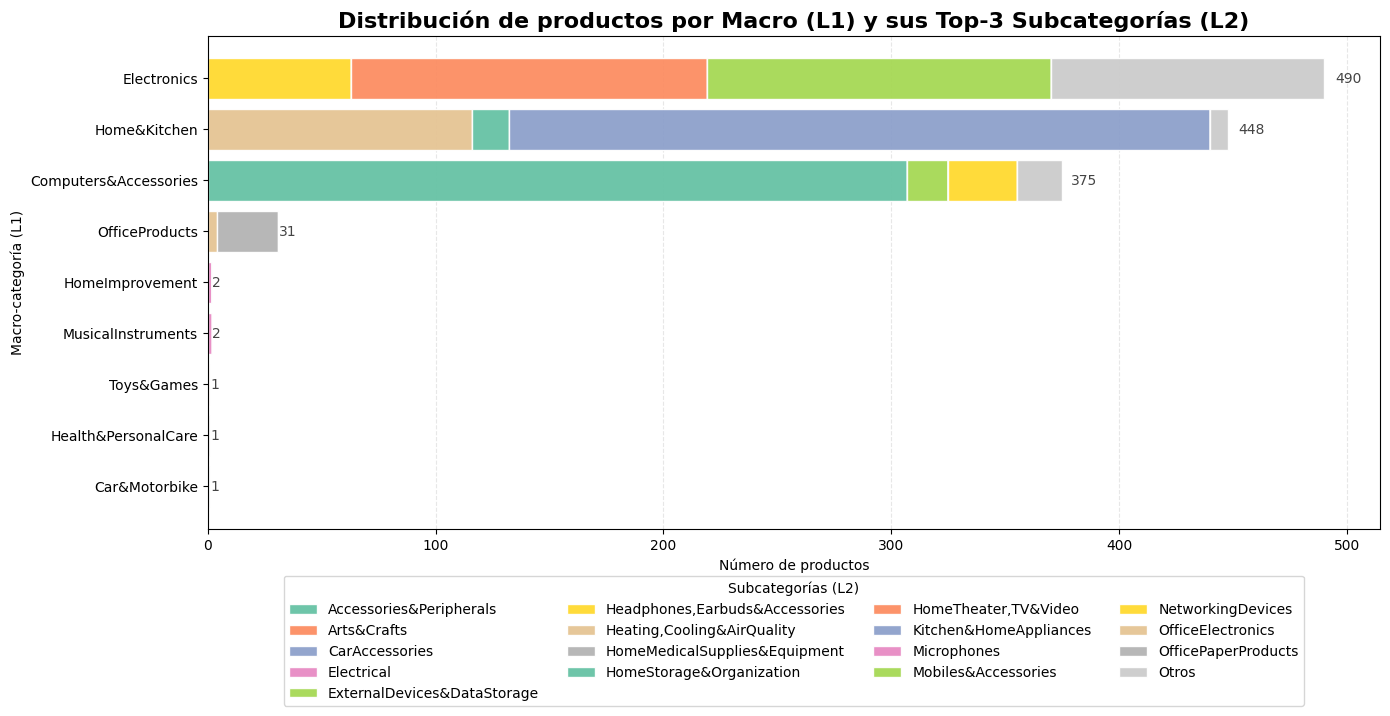

In [78]:
# ================== GRAFICAZO: Macro (L1) con reparto de Top-3 subcategorías (L2) ==================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Entrada: amazon con columnas ['product_id','category'] donde 'category' es ruta "Macro|Sub|...".
routes = amazon[["product_id","category"]].copy()
routes["category"] = routes["category"].astype(str).str.strip()
routes["parts"] = routes["category"].str.split("|")

# Niveles L1 (macro) y L2 (sub)
routes["L1"] = routes["parts"].apply(lambda xs: xs[0].strip() if isinstance(xs, list) and len(xs)>0 else np.nan)
routes["L2"] = routes["parts"].apply(lambda xs: xs[1].strip() if isinstance(xs, list) and len(xs)>1 else "Otros")

# --- Conteos por L1 y L1->L2 ---
macro = (routes.dropna(subset=["L1"])
                .groupby("L1", as_index=False)["product_id"].nunique()
                .rename(columns={"product_id":"n_prod_macro"}))

subs = (routes.dropna(subset=["L1"])
               .groupby(["L1","L2"], as_index=False)["product_id"].nunique()
               .rename(columns={"product_id":"n_prod_sub"}))

# --- Para cada macro, quedarnos con Top-3 subcategorías y agrupar el resto en "Otros" ---
def topk_with_other(df, k=3):
    df = df.sort_values("n_prod_sub", ascending=False)
    if len(df) <= k:
        return df
    top = df.head(k).copy()
    other = pd.DataFrame({
        "L1":[df["L1"].iloc[0]],
        "L2":["Otros"],
        "n_prod_sub":[df["n_prod_sub"].iloc[k:].sum()]
    })
    return pd.concat([top, other], ignore_index=True)

stacked = (subs.groupby("L1", group_keys=False)
                .apply(topk_with_other, k=3)
                .reset_index(drop=True))

# --- Ordenar macros por tamaño total ---
stacked_tot = stacked.groupby("L1", as_index=False)["n_prod_sub"].sum().rename(columns={"n_prod_sub":"n_total"})
stacked = stacked.merge(stacked_tot, on="L1", how="left")

# Selecciona las Top-N macros a mostrar
TOP_MACROS = 10
stacked = (stacked.sort_values(["n_total","n_prod_sub"], ascending=[False, False])
                  .groupby("L1", as_index=False)
                  .head(4))  # Top3 + 'Otros' = hasta 4 segmentos por macro
top_macros = stacked["L1"].drop_duplicates().head(TOP_MACROS)
stacked = stacked[stacked["L1"].isin(top_macros)]

# Recalcula orden final y pivota a formato ancho para apilar
order_macros = (stacked.groupby("L1")["n_prod_sub"].sum()
                        .sort_values(ascending=True)  # de menor a mayor para que la barra más grande quede arriba al final
                        .index.tolist())
stacked["L2"] = stacked["L2"].astype(str)

wide = (stacked.pivot_table(index="L1", columns="L2", values="n_prod_sub", aggfunc="sum", fill_value=0)
               .loc[order_macros])

# --- Colores (Top-3 + Otros) ---
subs_cols = [c for c in wide.columns if c!="Otros"]
palette = sns.color_palette("Set2", n_colors=len(subs_cols))
colors_map = dict(zip(subs_cols, palette))
colors_map["Otros"] = (0.80, 0.80, 0.80)  # gris suave para Otros

# --- Plot apilado horizontal ---
plt.figure(figsize=(14, 8))
left = np.zeros(len(wide))
ypos = np.arange(len(wide))

for col in subs_cols + (["Otros"] if "Otros" in wide.columns else []):
    vals = wide[col].values
    plt.barh(wide.index, vals, left=left, color=colors_map.get(col, "#cccccc"),
             edgecolor="white", linewidth=1.0, label=col, alpha=0.95)
    left += vals

# Anotar total al final de cada barra
totals = wide.sum(axis=1).astype(int)
for y, (name, total) in enumerate(totals.items()):
    plt.text(total*1.01, y, f"{total:,}".replace(",", "."), va="center", fontsize=10, color="#444")

plt.title("Distribución de productos por Macro (L1) y sus Top-3 Subcategorías (L2)", fontsize=16, fontweight="bold")
plt.xlabel("Número de productos")
plt.ylabel("Macro-categoría (L1)")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.gca().set_axisbelow(True)

# Leyenda abajo, centrada
handles, labels = plt.gca().get_legend_handles_labels()
# Quita duplicados manteniendo orden
seen, h2, l2 = set(), [], []
for h, lab in zip(handles, labels):
    if lab not in seen:
        seen.add(lab); h2.append(h); l2.append(lab)
plt.legend(h2, l2, title="Subcategorías (L2)", loc="upper center", bbox_to_anchor=(0.5, -0.08),
           ncol=min(4, len(l2)), frameon=True)

plt.tight_layout(rect=(0, 0.06, 1, 0.98))
plt.show()
